# Datasetovi - opis

Za air quality odabrali smo 3(ili samo ona 2) dataseta sa [sledeceg sajta](archive.ics.uci.edu/ml/datasets):
1. [Beijing Multi-Site Air-Quality Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data) - dataset sadrzi 6 glavnih polutanata i 6 glavnih meteoroloskih varijabli, merenih na nekoliko razlicitih sanica, svakog sata, oko Pekinga. Polja unutar dataseta su sledeca:
    1. No: row number
    1. year: year of data in this row
    1. month: month of data in this row
    1. day: day of data in this row
    1. hour: hour of data in this row
    1. PM2.5: PM2.5 concentration (ug/m^3)
    1. PM10: PM10 concentration (ug/m^3)
    1. SO2: SO2 concentration (ug/m^3)
    1. NO2: NO2 concentration (ug/m^3)
    1. CO: CO concentration (ug/m^3)
    1. O3: O3 concentration (ug/m^3)
    1. TEMP: temperature (degree Celsius)
    1. PRES: pressure (hPa)
    1. DEWP: dew point temperature (degree Celsius)
    1. RAIN: precipitation (mm)
    1. wd: wind direction
    1. WSPM: wind speed (m/s)
    1. station: name of the air-quality monitoring site


# Globalna podesavanja

In [1]:
import matplotlib.pyplot as plt

plt.rc("figure", autolayout=True, figsize=(11,6))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="medium",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)

plot_params= dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

# Ucitavanje podataka

In [2]:
import pandas as pd

base_data_folder = "./Data"

In [3]:
prsa_folder = "/PRSA Data - Chinese cities"

In [4]:
import os
datasets = [pd.read_csv(base_data_folder + prsa_folder+ "/" + file) for file in os.listdir(base_data_folder + prsa_folder) if file.endswith('.csv')]

prsa_dataset = pd.concat(datasets, axis=0)

prsa_dataset['datetime'] = pd.to_datetime(prsa_dataset[['year', 'month', 'day', 'hour']])
prsa_dataset.index = prsa_dataset['datetime'].dt.to_period('h') # 'dt' fetches 'datetimelike' properties of the Series object: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html

prsa_dataset.drop(columns=['year', 'month', 'day', 'hour', 'PM10', "SO2","NO2","CO","O3", "datetime"], inplace=True)
del datasets
prsa_dataset.sort_index(level='H', inplace=True)
prsa_dataset.head(15)

,No,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,
2013-03-01 00:00,1,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 00:00,1,6.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 00:00,1,4.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 00:00,1,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01 00:00,1,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 00:00,1,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 00:00,1,5.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 00:00,1,9.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 00:00,1,7.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou


# Trend

Prvo da uradimo pivotiranje tabele, jer imamo kolonu za stanicu

In [8]:
pivoted_data = prsa_dataset.pivot(columns=['station'], values=['PM2.5', 'TEMP', 'PRES', 'DEWP', "RAIN", 'WSPM'])
pivoted_data_PM25 = pivoted_data.copy(deep=True).loc[:, ('PM2.5')]
pivoted_data_PM25.isna().sum()

station
Aotizhongxin     925
Changping        774
Dingling         779
Dongsi           750
Guanyuan         616
Gucheng          646
Huairou          953
Nongzhanguan     628
Shunyi           913
Tiantan          677
Wanliu           382
Wanshouxigong    696
dtype: int64

Privremeno cemo, radi potrebe analize, sve vrednosti koje nedostaju za PM 2.5, popuniti linearnom interpolacijom

In [6]:
pivoted_data_PM25.interpolate(method="linear",limit_direction="both", inplace=True) 
pivoted_data_PM25.isna().sum()

station
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64

<Axes: title={'center': '365 day moving average za PM2.5'}, xlabel='datetime'>

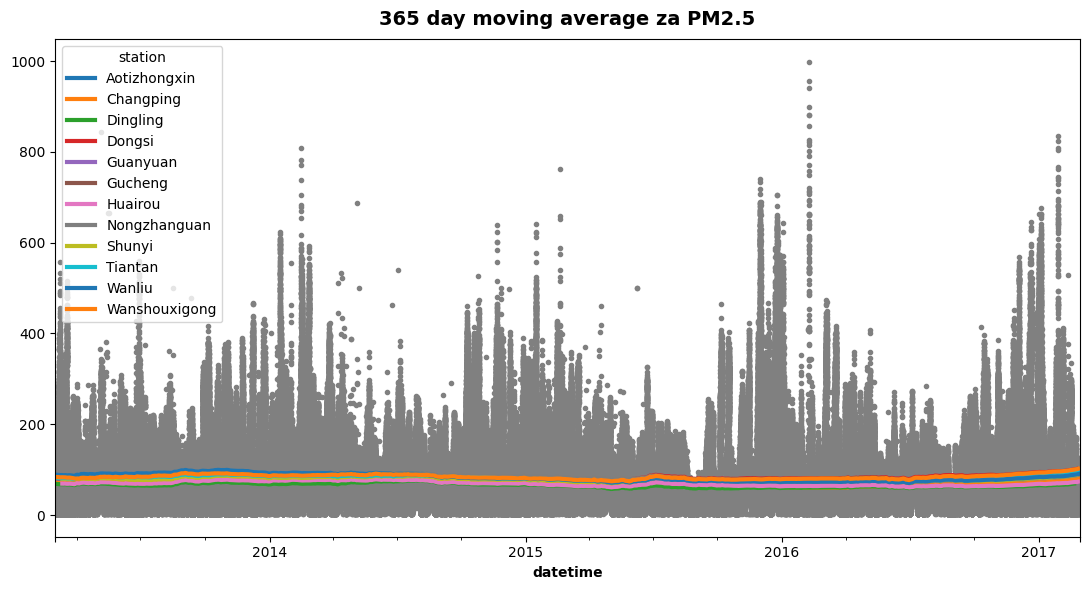

In [9]:
moving_average = pivoted_data_PM25.rolling(
    window=24*365,
    center=True,
    min_periods=12*365
).mean()


ax = pivoted_data_PM25.plot(style=".", color="0.5", legend=False)
moving_average.plot(
    ax=ax, linewidth=3, title="365 day moving average za PM2.5"
)

Iskreno, ne vidim nikakav trend ovde...
Da probamo sa manjim uzorcima? Npr. da uzorkujemo na nivou godine, a ne na celom datasetu...

<Axes: title={'center': '365 day moving average za PM2.5'}, xlabel='datetime'>

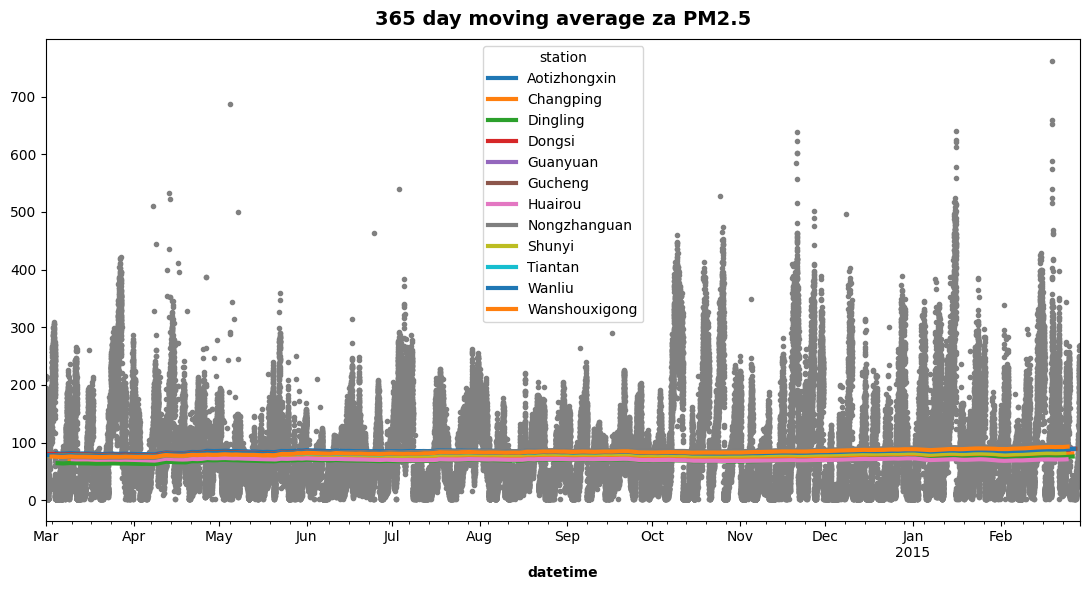

In [10]:
number_of_data = pivoted_data_PM25.shape[0]
godina=1 # koliko godina shiftujemo odabir?

sample = pivoted_data_PM25.iloc[godina*24*365:godina*24*365+24*365]
moving_average_sample = sample.rolling(
    window=24*365,
    center=True,
    min_periods=int(24*365/2)
).mean()


ax = sample.plot(style=".", color="0.5", legend=False)
moving_average_sample.plot(
    ax=ax, linewidth=3, title="365 day moving average za PM2.5"
)

Trend i dalje nije uocljiv, ali se sa podataka moze uociti neki sezonalnost...

Naime, jedan period(mozda kvartal) godisnje(zimski i jesenji meseci najverovatnije) zagadjenost enormno poraste.

In [10]:
prsa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 420768 entries, 2013-03-01 00:00 to 2017-02-28 23:00
Freq: H
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   PM2.5    412029 non-null  float64
 2   TEMP     420370 non-null  float64
 3   PRES     420375 non-null  float64
 4   DEWP     420365 non-null  float64
 5   RAIN     420378 non-null  float64
 6   wd       418946 non-null  object 
 7   WSPM     420450 non-null  float64
 8   station  420768 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 32.1+ MB


# Seasonality

In [13]:
import seaborn as sns

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

In [14]:
pivoted_data_PM25.head(10)

station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
datetime,,,,,,,,,,,,
2013-03-01 00:00,4.0,3.0,4.0,9.0,4.0,6.0,7.0,5.0,3.0,6.0,8.0,9.0
2013-03-01 01:00,8.0,3.0,7.0,4.0,4.0,6.0,4.0,8.0,12.0,6.0,9.0,11.0
2013-03-01 02:00,7.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,14.0,6.0,3.0,8.0
2013-03-01 03:00,6.0,3.0,6.0,3.0,3.0,6.0,3.0,5.0,12.0,6.0,11.0,8.0
2013-03-01 04:00,3.0,3.0,5.0,3.0,3.0,5.0,3.0,5.0,12.0,5.0,3.0,8.0
2013-03-01 05:00,5.0,3.0,6.0,4.0,3.0,4.0,4.0,3.0,11.0,10.0,3.0,10.0
2013-03-01 06:00,3.0,4.0,5.0,5.0,6.0,3.0,3.0,4.0,12.0,8.0,3.0,8.0
2013-03-01 07:00,3.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,13.0,7.0,3.0,8.0
2013-03-01 08:00,3.0,9.0,8.0,3.0,3.0,5.0,3.0,3.0,8.0,3.0,7.0,3.0


C:\Users\Zamachi\AppData\Local\Temp\ipykernel_5740\2819033073.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


ValueError: Could not interpret value `NumVehicles` for parameter `y`

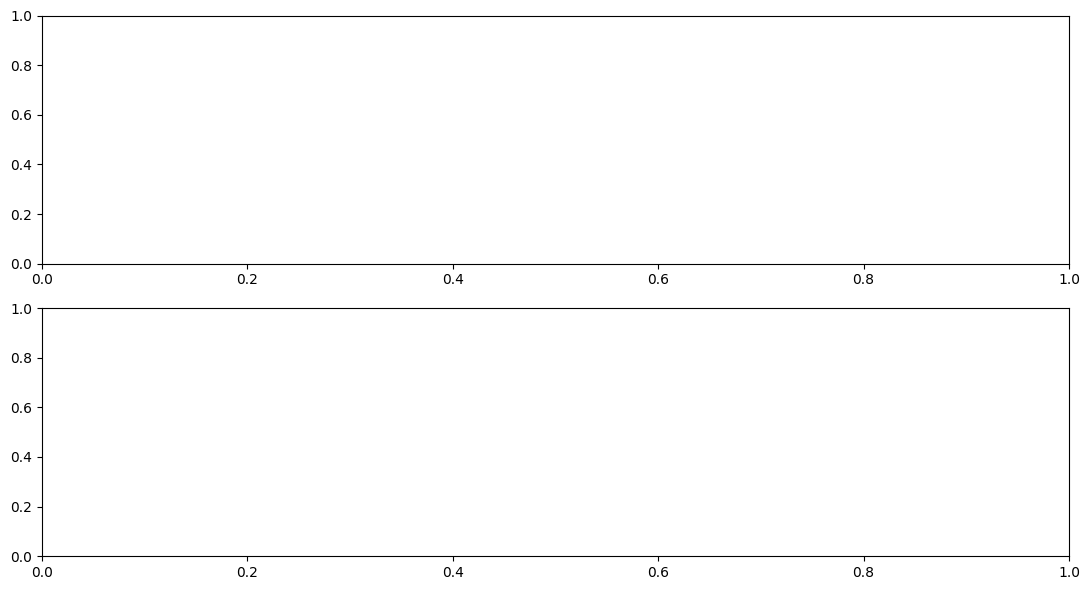

In [15]:
X = pivoted_data_PM25.copy()

X["day"] = X.index.dayofweek  
X["week"] = X.index.week 

X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

## EDA

Da vidimo imali Null/None/NaN vrednosti

In [11]:
print(prsa_dataset.isna().sum())
print("\n", prsa_dataset.shape)

No            0
PM2.5      8739
TEMP        398
PRES        393
DEWP        403
RAIN        390
wd         1822
WSPM        318
station       0
dtype: int64

 (420768, 9)


Da, ima ih, njima cemo morati da se pozabavimo

In [26]:
prsa_dataset['station'].value_counts()

Aotizhongxin     35064
Tiantan          35064
Dingling         35064
Wanliu           35064
Changping        35064
Shunyi           35064
Nongzhanguan     35064
Wanshouxigong    35064
Huairou          35064
Gucheng          35064
Guanyuan         35064
Dongsi           35064
Name: station, dtype: int64

Vidimo da su, po kategorickom atributu 'stanice', redovi izbalansirani

<BarContainer object of 16 artists>

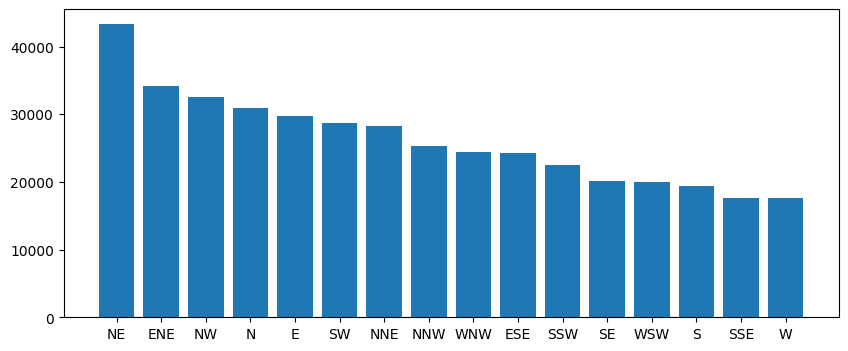

In [7]:
import matplotlib.pyplot as plt
wind_direction = prsa_dataset['wd'].value_counts()

plt.figure(figsize=(10,4))
plt.bar(x=wind_direction.index, height=wind_direction)

Sto se pravca vetra tice, nije balansiran, ali ima odredjenu raspodelu

In [9]:
prsa_dataset[prsa_dataset['wd'].isna()]['station'].value_counts()

Shunyi           483
Huairou          302
Gucheng          159
Changping        140
Dingling         140
Wanliu           123
Aotizhongxin      81
Guanyuan          81
Wanshouxigong     79
Dongsi            78
Nongzhanguan      78
Tiantan           78
Name: station, dtype: int64

Prikaz nedostajucih vrednosti pravca vetra po stanici

Za prikaz korelacione matrice moracemo da prebacimo kategoricke atribute u numericke, ali i da popunimo vrednosti koje nedostaju

In [6]:
prsa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 420768 entries, 2013-03-01 00:00 to 2017-02-28 23:00
Freq: H
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   PM2.5    412029 non-null  float64
 2   TEMP     420370 non-null  float64
 3   PRES     420375 non-null  float64
 4   DEWP     420365 non-null  float64
 5   RAIN     420378 non-null  float64
 6   wd       418946 non-null  object 
 7   WSPM     420450 non-null  float64
 8   station  420768 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 32.1+ MB


Znaci, nase kategoricke kolone su `wd` i `WSPM`, od kojih samo `wd` sadrzi vrednosti koje treba hendlovati.

In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
prsa_dataset_copy = prsa_dataset.copy()
prsa_dataset_copy['wd'] = np.where(prsa_dataset_copy['wd'].isnull(), 'NULL', prsa_dataset_copy['wd'])

encoder_prsa_dataset_copy = LabelEncoder()

prsa_dataset_copy['wd_encoded'] = encoder_prsa_dataset_copy.fit_transform(prsa_dataset_copy['wd'])

prsa_dataset_copy['wd_encoded'] = np.where(prsa_dataset_copy['wd_encoded'] == 7, np.nan,
                                prsa_dataset_copy['wd_encoded'])

imputer_prsa_dataset_copy = SimpleImputer(missing_values=np.nan, strategy='median')

prsa_dataset_copy['wd_encoded'] = imputer_prsa_dataset_copy.fit_transform(prsa_dataset_copy['wd_encoded'].values.reshape(-1,1)).astype(int)

prsa_dataset_copy['wd_decoded'] = encoder_prsa_dataset_copy.inverse_transform( prsa_dataset_copy['wd_encoded'])

prsa_dataset_copy.drop(['wd', 'wd_encoded'], axis=1, inplace=True)
prsa_dataset_copy.rename(columns={'wd_decoded':'wd'}, inplace=True)

categorical_columns = ['wd', 'station']
for abc in categorical_columns:
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
    encodings = one_hot_encoder.fit_transform(prsa_dataset_copy[abc].values.reshape(-1,1))
    prsa_dataset_copy[one_hot_encoder.categories_[0]] = encodings.toarray()
    prsa_dataset_copy.drop(abc, axis=1, inplace=True) 

In [19]:
correlation_matrix = prsa_dataset_copy.corr(method='pearson')
correlation_matrix.style.background_gradient()

,No,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
No,1.000000,-0.023569,-0.122409,0.188280,-0.101972,0.004877,0.054214,-0.009701,0.006319,-0.012774,-0.025606,0.037623,0.001705,0.033484,0.068003,-0.011403,0.013029,-0.008668,-0.021771,-0.002622,-0.048445,-0.012643,-0.038940,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
PM2.5,-0.023569,1.000000,-0.131127,0.018566,0.114656,-0.014359,-0.272205,0.074759,0.066418,0.067903,-0.044279,0.026387,-0.029964,-0.074908,-0.101632,0.025928,0.046428,0.035508,0.012237,-0.001571,-0.015813,-0.071557,-0.006873,0.011083,-0.032409,-0.051455,0.023870,0.011735,0.015161,-0.037793,0.018851,-0.001123,0.008854,0.013434,0.019523
TEMP,-0.122409,-0.131127,1.000000,-0.813309,0.820118,0.037635,0.033036,0.010680,-0.044408,0.040993,-0.050716,-0.081098,-0.036721,-0.073629,-0.093448,0.097748,0.050909,0.090873,0.111789,0.091801,-0.016073,-0.060978,0.044113,0.001203,0.003878,0.003878,0.003494,0.001203,0.008581,-0.028823,0.003494,-0.003980,0.003494,-0.002904,0.006474
PRES,0.188280,0.018566,-0.813309,1.000000,-0.750222,-0.060948,0.065099,-0.014829,0.039585,-0.036560,0.025333,0.072361,0.031237,0.039836,0.057727,-0.058071,-0.028047,-0.057233,-0.065258,-0.045323,-0.014470,0.018844,-0.027213,0.031670,-0.085954,-0.085954,0.051839,0.031670,-0.055180,-0.090603,0.051839,0.066621,0.051839,0.010093,0.022021
DEWP,-0.101972,0.114656,0.820118,-0.750222,1.000000,0.086292,-0.296591,0.063945,0.024579,0.068879,-0.040784,-0.012315,-0.010389,-0.095539,-0.139684,0.060354,0.051723,0.065161,0.061223,0.040764,-0.015891,-0.103637,0.023760,0.013823,-0.021531,-0.021531,-0.000946,0.013823,0.002614,-0.005511,-0.000946,-0.000563,-0.000946,0.016961,0.004736
RAIN,0.004877,-0.014359,0.037635,-0.060948,0.086292,1.000000,0.021022,0.004296,0.012301,0.005379,-0.002888,0.008707,0.010695,-0.001097,-0.007563,-0.007173,-0.005942,-0.002921,-0.008316,-0.006066,0.005913,-0.005507,-0.005298,0.001082,-0.001509,-0.001509,-0.000168,0.001082,-0.000008,0.001272,-0.000168,-0.001241,-0.000168,0.001391,-0.000057
WSPM,0.054214,-0.272205,0.033036,0.065099,-0.296591,0.021022,1.000000,-0.092811,-0.092649,-0.036397,-0.025568,-0.086950,-0.042525,0.061708,0.171567,0.000500,-0.036833,-0.009510,0.019539,0.047786,-0.018995,0.159672,0.000222,-0.005133,0.030019,0.030019,0.031714,-0.005133,-0.093451,-0.018787,0.031714,0.018821,0.031714,-0.055286,0.003775
E,-0.009701,0.074759,0.010680,-0.014829,0.063945,0.004296,-0.092811,1.000000,-0.081971,-0.068171,-0.077615,-0.093467,-0.073976,-0.072442,-0.079939,-0.060653,-0.061741,-0.057794,-0.065661,-0.074709,-0.057570,-0.068402,-0.061686,0.004316,-0.001756,-0.001756,0.036385,0.004316,-0.029263,-0.010746,0.036385,-0.044492,0.036385,-0.040769,0.010992
ENE,0.006319,0.066418,-0.044408,0.039585,0.024579,0.012301,-0.092649,-0.081971,1.000000,-0.073441,-0.083615,-0.100693,-0.079695,-0.078042,-0.086119,-0.065341,-0.066513,-0.062261,-0.070737,-0.080485,-0.062021,-0.073690,-0.066454,0.034793,-0.048502,-0.048502,0.031990,0.034793,-0.030237,-0.025797,0.031990,-0.045007,0.031990,0.025094,0.007395
ESE,-0.012774,0.067903,0.040993,-0.036560,0.068879,0.005379,-0.036397,-0.068171,-0.073441,1.000000,-0.069538,-0.083741,-0.066278,-0.064904,-0.071621,-0.054341,-0.055316,-0.051780,-0.058828,-0.066935,-0.051579,-0.061284,-0.055267,-0.011125,0.028341,0.028341,0.025388,-0.011125,-0.024563,0.000135,0.025388,-0.023677,0.025388,-0.053397,-0.009094


In [ ]:
del correlation_matrix, prsa_dataset_copy

# Imputacija vrednosti i enkodovanje kategorickih atributa

In [72]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
def impute_and_encode(train: pd.DataFrame, test: pd.DataFrame):
    train['wd'] = np.where(train['wd'].isnull(), 'NULL', train['wd'])
    test['wd'] = np.where(test['wd'].isnull(), 'NULL', test['wd'])

    encoder_train = LabelEncoder()
    encoder_test = LabelEncoder()

    encoder_train.fit(train['wd'])
    mappings_train = dict(zip(encoder_train.classes_, encoder_train.transform(encoder_train.classes_)))
    train['wd_encoded'] = encoder_train.transform(train['wd'])

    encoder_test.fit(test['wd'])
    mappings_test = dict(zip(encoder_test.classes_, encoder_test.transform(encoder_test.classes_)))
    test['wd_encoded'] = encoder_test.transform(test['wd'])

    train['wd_encoded'] = np.where(train['wd_encoded'] == mappings_train['NULL'], np.nan,
                                   train['wd_encoded'])
    test['wd_encoded'] = np.where(test['wd_encoded'] == mappings_test['NULL'], np.nan,
                                  test['wd_encoded'])

    imputer_train = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer_test = SimpleImputer(missing_values=np.nan, strategy='median')

    train['wd_encoded'] = imputer_train.fit_transform(train['wd_encoded'].values.reshape(-1,1)).astype(int)
    test['wd_encoded'] = imputer_test.fit_transform(test['wd_encoded'].values.reshape(-1,1)).astype(int)
    
    train.drop(['wd'], axis=1, inplace=True)
    test.drop(['wd'], axis=1, inplace=True)
    train.rename(columns={'wd_encoded':'wd'}, inplace=True)
    test.rename(columns={'wd_encoded':'wd'}, inplace=True)

    return train,test

# Splitovanje dataseta prema lokaciji

In [91]:
prsa_processed_splits_folder = "/PRSA Data - Processed splits"
processed_ds = []
train_size = 0.75

pd.options.mode.copy_on_write = True # potiskuje warninge i ukljucuje optimizaciju prilikom kopiranja

train, test = prsa_dataset.copy(deep=True).iloc[:int(prsa_dataset.shape[0]*train_size)], prsa_dataset.copy(deep=True).iloc[int(prsa_dataset.shape[0]*train_size):]
for station in prsa_dataset.station.unique():
    train_data_for_station = train.loc[train['station'] == station]
    test_data_for_station = test.loc[test['station'] == station]
    train_data_for_station,test_data_for_station = impute_and_encode(train_data_for_station,test_data_for_station)
    train_data_for_station.interpolate(method="linear",limit_direction="both", inplace=True) 
    test_data_for_station.interpolate(method="linear",limit_direction="both", inplace=True)
    processed_ds.append(train_data_for_station)
    processed_ds.append(test_data_for_station)
    train_data_for_station.to_csv(base_data_folder + prsa_processed_splits_folder+ "/" + station+" - train.csv")  
    test_data_for_station.to_csv(base_data_folder + prsa_processed_splits_folder+ "/" + station+" - test.csv")  

print(pd.concat(processed_ds, axis=0).isna().sum()) # cisto da proverimo da li ima Null/NaNs na kraju obrade
del processed_ds

(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
(26298, 9)
No         0
PM2.5      0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
wd         0
dtype: int64


Sada, nakon obrade, imamo folder `PRSA Data - Processed splits` u kojem se nalaze obradjeni dataset, rastavljen na pojedinacne fajlove(prema stanicama)